In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ratings=pd.read_csv("./ratings.csv")

In [5]:
movie=pd.read_csv("./movies.csv")

In [6]:
movie['year'] = movie['title'].str.extract(r'([0-9]{4})', expand=True)

#  Checking the data to see how many movies are present in data set

In [7]:
movie.shape

(62423, 4)

# Now finding out average rating

In [10]:
avg_rating=ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()

In [11]:
movie=movie.merge(avg_rating)


# Now checking first few rows of the dataset

In [12]:
movie.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.853547
4,5,Father of the Bride Part II (1995),Comedy,1995,3.058434


In [13]:
movie['timestamp']=pd.to_datetime(ratings.timestamp,unit='s')

In [14]:
movie.head()

,movieId,title,genres,year,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.893708,2006-05-17 15:34:04
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.251527,2006-05-17 12:26:57
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.142028,2006-05-17 12:27:08
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.853547,2006-05-17 15:13:40
4,5,Father of the Bride Part II (1995),Comedy,1995,3.058434,2006-05-17 12:21:50


# Now checking if there are any null values

In [15]:
movie.isnull().any()

movieId      False
title        False
genres       False
year          True
rating       False
timestamp    False
dtype: bool

As we see that in Year there is/are null values as the value returned is True and for rest its False.


We dont need movie year ,so deleting it

In [17]:
del movie['year']

# Saving the required data set to another file

In [18]:
movie.to_csv('FinalDataset.csv',encoding='utf-8')

In [19]:
finaldata=pd.read_csv('./FinalDataset.csv')
finaldata.head(10)

,Unnamed: 0,movieId,title,genres,rating,timestamp
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,2006-05-17 15:34:04
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,2006-05-17 12:26:57
2,2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,2006-05-17 12:27:08
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2006-05-17 15:13:40
4,4,5,Father of the Bride Part II (1995),Comedy,3.058434,2006-05-17 12:21:50
5,5,6,Heat (1995),Action|Crime|Thriller,3.854909,2006-05-17 12:21:35
6,6,7,Sabrina (1995),Comedy|Romance,3.363666,2006-05-17 12:27:06
7,7,8,Tom and Huck (1995),Adventure|Children,3.114583,2006-05-17 15:05:26
8,8,9,Sudden Death (1995),Action,2.992051,2006-05-17 12:27:19
9,9,10,GoldenEye (1995),Action|Adventure|Thriller,3.421458,2006-05-17 12:20:14


Now we got the data, but we see that there is one column called unnamed:0. In next step deleting it

In [20]:
del finaldata['Unnamed: 0']

In [21]:
finaldata.head()

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,2006-05-17 15:34:04
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,2006-05-17 12:26:57
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,2006-05-17 12:27:08
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2006-05-17 15:13:40
4,5,Father of the Bride Part II (1995),Comedy,3.058434,2006-05-17 12:21:50


# Top genre of movies according to ratings and number of movies made

In [22]:
genrating=finaldata[['genres','rating']]

In [23]:
genrating['gencount']=genrating.groupby('genres',as_index=False)['genres'].transform(lambda s:s.count())


C:\Users\idhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
genrating.head()

,genres,rating,gencount
0,Adventure|Animation|Children|Comedy|Fantasy,3.893708,33
1,Adventure|Children|Fantasy,3.251527,69
2,Comedy|Romance,3.142028,1464
3,Comedy|Drama|Romance,2.853547,1014
4,Comedy,3.058434,5291


In [26]:
morenum=genrating['gencount']>1

In [27]:
genrating=genrating[morenum]

Now sorting values accordingly to genre counts

In [28]:
genrating.sort_values(by='gencount',inplace=True,ascending=False)

In [29]:
genrating.head()

,genres,rating,gencount
24962,Drama,2.000000,8637
15839,Drama,3.222222,8637
15843,Drama,2.961538,8637
15847,Drama,3.000000,8637
15852,Drama,2.444444,8637


In [30]:
genrating=genrating.groupby('genres').mean()

In [31]:
genrating.head()

,rating,gencount
genres,,
(no genres listed),3.048613,4568
Action,2.796467,499
Action|Adventure,2.807942,170
Action|Adventure|Animation,2.961637,30
Action|Adventure|Animation|Children,3.024022,6


In [32]:
genrating.sort_values(by=['gencount','rating'],inplace=True,ascending=False)

In [33]:
genrating.head(10)

,rating,gencount
genres,,
Drama,3.216112,8637
Comedy,2.977916,5291
Documentary,3.392415,4603
(no genres listed),3.048613,4568
Comedy|Drama,3.204235,2312
Drama|Romance,3.217268,2006
Horror,2.545332,1556
Comedy|Romance,3.057254,1464
Comedy|Drama|Romance,3.209647,1014


In [34]:
genrating=genrating.reset_index()

In [35]:
genrating.head()

,genres,rating,gencount
0,Drama,3.216112,8637
1,Comedy,2.977916,5291
2,Documentary,3.392415,4603
3,(no genres listed),3.048613,4568
4,Comedy|Drama,3.204235,2312


In [36]:
genrating.head(15)

,genres,rating,gencount
0,Drama,3.216112,8637
1,Comedy,2.977916,5291
2,Documentary,3.392415,4603
3,(no genres listed),3.048613,4568
4,Comedy|Drama,3.204235,2312
5,Drama|Romance,3.217268,2006
6,Horror,2.545332,1556
7,Comedy|Romance,3.057254,1464
8,Comedy|Drama|Romance,3.209647,1014
9,Drama|Thriller,3.052101,895


We see that genres like Drama, Comedy and documentary are the biggest chunk in terms of number of counts(number of movies made) 
Where as if we see the movies on the basis of ratings given on IMDB genres like Documentary,Drama|War ,Drama are popular

# Horror vs Sci-Fi

In [37]:
sci=finaldata[finaldata.genres.str.contains('Sci-Fi')]

In [38]:
sci.rating.describe()

count    3502.000000
mean        2.760530
std         0.774375
min         0.500000
25%         2.285714
50%         2.835753
75%         3.294988
max         5.000000
Name: rating, dtype: float64

In [39]:
horror=finaldata[finaldata.genres.str.contains('Horror')]

In [41]:
horror.rating.describe()

count    5746.000000
mean        2.650740
std         0.776129
min         0.500000
25%         2.214286
50%         2.715564
75%         3.125000
max         5.000000
Name: rating, dtype: float64

In [42]:
sci=sci.sort_values(by='timestamp')

In [43]:
sci['year'] = sci['title'].str.extract('.*\((.*)\).*', expand=True)

In [44]:
sci=sci[['rating','year']]

In [45]:
sciyear=sci.year.value_counts()

Text(0, 0.5, 'Number of Sci-Fi Movies Released')

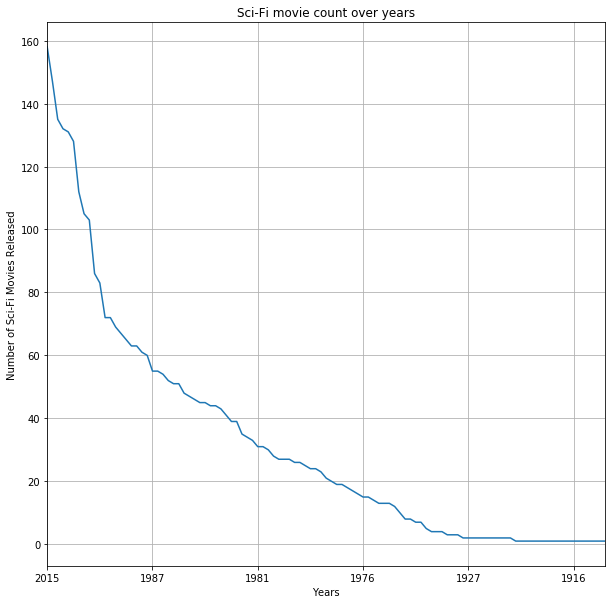

In [46]:
%matplotlib inline

graph=sciyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Sci-Fi movie count over years")
graph.set_xlabel("Years")
graph.set_ylabel("Number of Sci-Fi Movies Released")

**Horror Movie count per year**

In [47]:
horror['year'] = horror['title'].str.extract('.*\((.*)\).*', expand=True)

C:\Users\idhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
horror=horror[['rating','year']]

In [49]:
horroryear=horror.year.value_counts()

Text(0, 0.5, 'Number of Horror Movies Released')

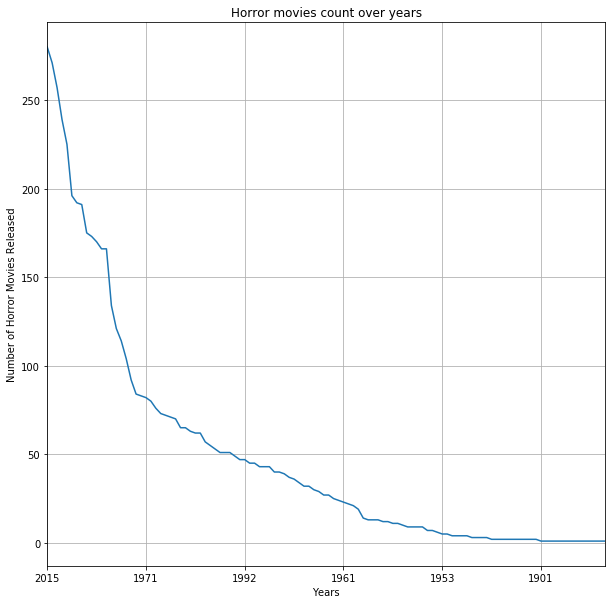

In [50]:
%matplotlib inline

horrorgraph=horroryear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Horror movies count over years")
horrorgraph.set_xlabel("Years")
horrorgraph.set_ylabel("Number of Horror Movies Released")

From the above two graphs we see that number of movies made in genre Horror and sci-fi increased  significantly, but before 1901(in case of horror genre) it was pretty stagnant.

On the other side, sci-fi genre also saw a huge spike in the number of movies made in that category.

# Overall movies production trend

In [51]:
overall=finaldata.sort_values(by='timestamp')
overall['year'] = overall['title'].str.extract('.*\((.*)\).*', expand=True)
overall=overall[['rating','year']]
overyear=overall.year.value_counts()

Text(0, 0.5, 'Number of Toal Movies Released')

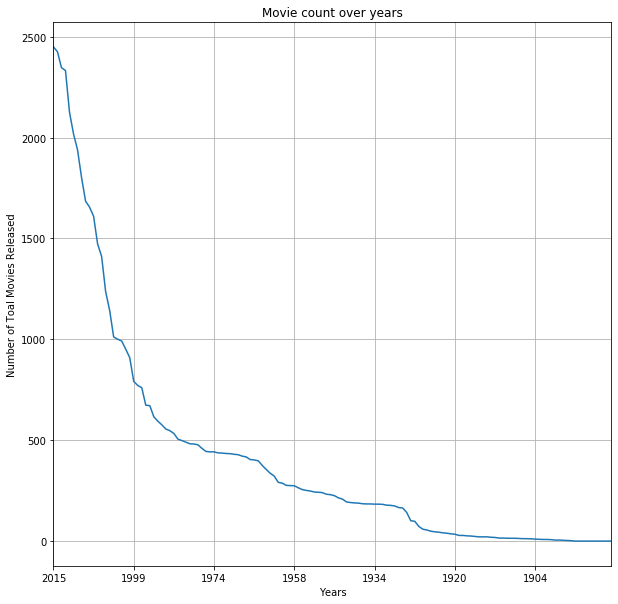

In [52]:
%matplotlib inline

overgraph=overyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Movie count over years")
overgraph.set_xlabel("Years")
overgraph.set_ylabel("Number of Toal Movies Released")

# Analysis on the graphs 

First we compared Genres Horror and Sci-fi, as from the graph its pretty much safe to assume that number of movies produced in both genre increased in subsequent years.

When we see timeline plots of Horror genre,sci-fi and the overall movie production timeplot, we see that as the timeline progressed not only the specific genres movie count increased leaving other genres deprived, but the total overall count of movies (collectively increased)

To see and confirm if every genre faced a increase in movies count thus contributing to overall movie count plot or not, we would take another genre.


**Action movies count per Year plot**

In [55]:
action=finaldata[finaldata.genres.str.contains('Action')]

In [56]:
action=action.sort_values(by='timestamp')

In [57]:
action['year'] = action['title'].str.extract('.*\((.*)\).*', expand=True)

In [58]:
action=action[['rating','year']]

In [59]:
actionyear=action.year.value_counts()

Text(0, 0.5, 'Number of Action Movies Released')

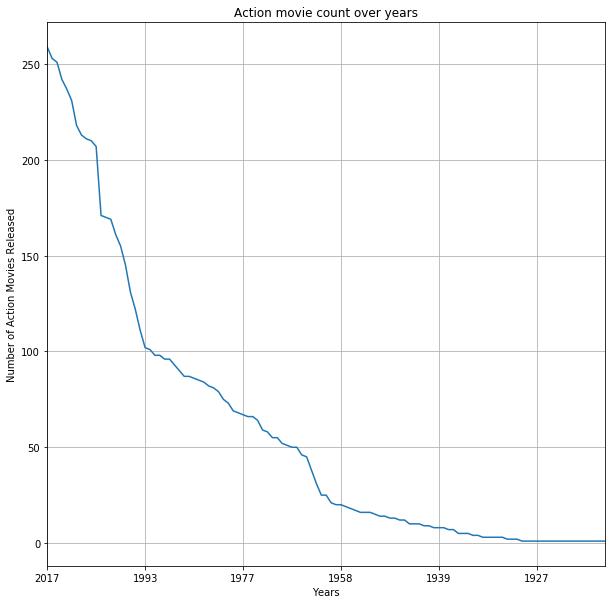

In [60]:
%matplotlib inline

actiongraph=actionyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Action movie count over years")
actiongraph.set_xlabel("Years")
actiongraph.set_ylabel("Number of Action Movies Released")

**Romance Movies count per year**

In [61]:
romance=finaldata[finaldata.genres.str.contains('Romance')]

In [62]:
romance=romance.sort_values(by='timestamp')

In [63]:
romance['year'] = romance['title'].str.extract('.*\((.*)\).*', expand=True)

In [64]:
romance=romance[['rating','year']]

In [66]:
romyear=romance.year.value_counts()

Text(0, 0.5, 'Number of Romantic Movies Released')

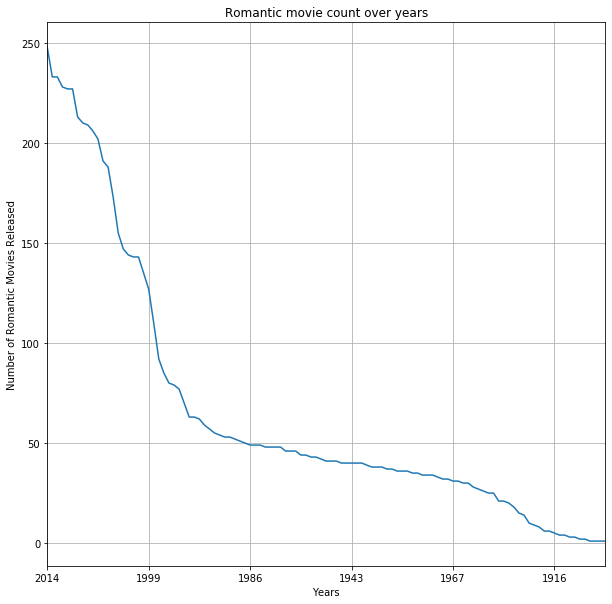

In [67]:

romgraph=romyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Romantic movie count over years")
romgraph.set_xlabel("Years")
romgraph.set_ylabel("Number of Romantic Movies Released")

# Analysis from the plots of Romance and Action Genre

From the above two plots we can safely say that as the timeline progressed, number of movies produced in each genre increased thus contributing the gradual increase in the overall movies production graph.
